## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import heapq
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data= pd.read_csv("Balance.csv",nrows=80)
data

,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,4.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Blue,10,4,7
1,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,1.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
2,Jouanna Tadros,Female,CS,Student,21,3.0,2.0,4.0,3.0,2.0,...,7.0,8.0,9.0,8.0,NaN,NaN,Orange,5,11,16
3,Hala Hazem,Female,Engineering,Senior Student,20,4.0,4.0,3.0,3.0,3.0,...,7.0,6.0,6.0,8.0,9.0,4.0,Gold,10,18,7
4,Mazen Farouk,Male,Engineering,Student,21,4.0,3.0,2.0,4.0,2.0,...,10.0,9.0,9.0,10.0,9.0,8.0,Orange,13,14,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Kerolose Malak,Male,CS,Senior Student,21,4.0,3.0,3.0,4.0,5.0,...,7.0,10.0,6.0,8.0,8.0,7.0,Gold,3,10,17
76,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,1.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
77,Hana Amer,Female,Interior Design,Senior Student,21,4.0,4.0,4.0,3.0,4.0,...,6.0,7.0,8.0,6.0,6.0,3.0,Green,10,11,1
78,Sara Hisham,Female,Engineering,Senior Student,21,4.0,5.0,3.0,3.0,3.0,...,3.0,4.0,6.0,7.0,8.0,6.0,Blue,7,10,17


In [3]:
data.dtypes

Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Interface_18         float64
Interface_19         float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               80 non-null     object 
 1   Gender             80 non-null     object 
 2   Field              80 non-null     object 
 3   Occupation         80 non-null     object 
 4   Age                80 non-null     int64  
 5   Openness           80 non-null     float64
 6   Extraversion       80 non-null     float64
 7   Agreeableness      80 non-null     float64
 8   Conscientiousness  80 non-null     float64
 9   Neuroticism        80 non-null     float64
 10  Interface_1        80 non-null     float64
 11  Interface_2        80 non-null     float64
 12  Interface_3        80 non-null     float64
 13  Interface_4        80 non-null     float64
 14  Interface_5        80 non-null     float64
 15  Interface_6        80 non-null     float64
 16  Interface_7        80 non-nu

In [5]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         7.5
Interface_19         7.5
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [6]:
data['Interface_18'].fillna(value=data['Interface_18'].mean(), inplace=True)

In [7]:
data['Interface_19'].fillna(value=data['Interface_19'].mean(), inplace=True)


In [8]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         0.0
Interface_19         0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [9]:
data['Test_Score'] .unique()

array(['Blue', 'Orange', 'Gold', 'Green'], dtype=object)

In [10]:
data.describe()


,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,...,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,22.562500,4.006250,3.300000,3.50000,2.668750,3.293750,6.818750,6.05250,6.055000,6.291250,...,7.218750,6.550000,6.456250,7.043750,7.803750,6.129730,6.117568,9.525000,10.662500,10.700000
std,6.615754,0.828655,1.259395,0.88946,1.423011,1.289426,1.754278,1.91932,1.912378,1.906033,...,2.031405,2.272009,2.308753,1.745145,1.855914,2.062365,2.173393,4.608674,5.315237,5.377873
min,15.000000,2.000000,1.000000,1.00000,1.000000,1.000000,3.000000,2.00000,2.000000,2.000000,...,2.300000,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,3.000000,2.000000,3.00000,1.000000,2.000000,6.000000,5.00000,5.000000,5.000000,...,6.000000,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000
50%,21.000000,4.000000,3.000000,3.25000,3.000000,3.000000,7.000000,6.00000,6.000000,6.000000,...,7.500000,7.000000,7.000000,7.000000,8.000000,6.129730,6.117568,10.000000,10.000000,11.000000
75%,22.000000,5.000000,4.000000,4.00000,4.000000,4.000000,8.000000,7.00000,7.000000,8.000000,...,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,13.000000,16.000000,16.000000
max,57.000000,5.000000,5.000000,5.00000,5.000000,5.000000,10.000000,10.00000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,19.000000,19.000000


In [11]:
data.value_counts('Test_Score')

Test_Score
Orange    21
Blue      20
Green     20
Gold      19
dtype: int64

# Statistical analysis

In [12]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
Age,1.000000,0.010000,0.210000,0.230000,0.230000,0.050000,0.110000,0.080000,0.060000,0.180000,0.060000,0.130000,-0.020000,0.050000,0.040000,-0.100000,-0.010000,0.050000,0.080000,0.180000,0.210000,0.090000,-0.040000,0.190000,0.060000,0.020000,0.080000,0.030000
Openness,0.010000,1.000000,0.310000,0.140000,0.230000,-0.050000,0.010000,0.010000,0.060000,0.140000,0.230000,0.100000,0.040000,0.050000,-0.040000,0.110000,0.060000,-0.010000,0.170000,0.020000,-0.070000,0.100000,0.090000,0.100000,-0.070000,0.040000,-0.190000,-0.030000
Extraversion,0.210000,0.310000,1.000000,0.070000,0.030000,-0.050000,-0.080000,0.140000,0.080000,0.240000,0.140000,0.130000,0.090000,0.000000,0.040000,0.050000,0.050000,0.030000,0.030000,0.050000,-0.010000,0.190000,-0.070000,0.190000,-0.100000,0.020000,-0.010000,0.090000
Agreeableness,0.230000,0.140000,0.070000,1.000000,0.050000,0.210000,0.030000,0.070000,0.090000,0.060000,0.110000,-0.060000,-0.110000,-0.050000,0.100000,-0.150000,-0.080000,0.130000,-0.060000,-0.010000,0.000000,0.010000,-0.090000,0.120000,0.000000,0.080000,-0.220000,-0.040000
Conscientiousness,0.230000,0.230000,0.030000,0.050000,1.000000,0.060000,0.120000,0.140000,-0.020000,0.040000,0.070000,0.080000,0.030000,0.020000,0.150000,0.050000,0.100000,-0.060000,0.150000,0.140000,0.070000,0.040000,0.090000,0.040000,0.020000,0.030000,0.020000,0.080000
Neuroticism,0.050000,-0.050000,-0.050000,0.210000,0.060000,1.000000,0.240000,0.140000,0.250000,0.160000,0.200000,0.060000,0.000000,-0.020000,0.100000,0.170000,0.130000,0.170000,0.060000,-0.030000,-0.010000,0.030000,-0.020000,0.080000,0.050000,-0.320000,-0.170000,-0.010000
Interface_1,0.110000,0.010000,-0.080000,0.030000,0.120000,0.240000,1.000000,0.710000,0.790000,0.420000,0.580000,0.170000,0.140000,0.070000,0.090000,0.220000,0.490000,0.410000,0.190000,0.190000,0.350000,0.220000,0.420000,0.250000,0.210000,-0.360000,-0.300000,-0.400000
Interface_2,0.080000,0.010000,0.140000,0.070000,0.140000,0.140000,0.710000,1.000000,0.740000,0.410000,0.430000,0.230000,0.260000,0.210000,0.240000,0.200000,0.350000,0.350000,0.230000,0.240000,0.350000,0.260000,0.340000,0.320000,0.160000,-0.450000,-0.310000,-0.270000
Interface_3,0.060000,0.060000,0.080000,0.090000,-0.020000,0.250000,0.790000,0.740000,1.000000,0.310000,0.380000,0.250000,0.210000,0.080000,0.070000,0.240000,0.400000,0.350000,0.180000,0.200000,0.350000,0.190000,0.350000,0.330000,0.160000,-0.350000,-0.240000,-0.370000
Interface_4,0.180000,0.140000,0.240000,0.060000,0.040000,0.160000,0.420000,0.410000,0.310000,1.000000,0.290000,0.110000,0.170000,0.160000,0.100000,0.220000,0.170000,0.470000,0.360000,0.470000,0.350000,0.210000,0.110000,0.700000,0.150000,-0.240000,-0.120000,-0.050000


# get dynamic the highest and lowest interfaces along all the personalities

In [13]:
data_1= data[data.columns[10:30]]
data_1


,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score
0,6.0,5.0,6.0,8.0,7.0,4.0,8.0,6.0,2.0,9.0,6.0,8.0,7.0,2.0,1.0,7.0,6.0,8.00000,7.000000,Blue
1,6.0,5.5,5.0,6.0,6.5,5.0,7.0,5.0,4.0,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.50000,9.000000,Blue
2,7.0,8.0,6.0,3.0,9.0,7.0,8.0,3.0,3.0,6.0,9.0,8.0,6.0,7.0,8.0,9.0,8.0,6.12973,6.117568,Orange
3,6.0,4.0,7.0,6.0,5.0,7.5,8.0,3.0,3.0,9.0,5.0,5.0,5.0,7.0,6.0,6.0,8.0,9.00000,4.000000,Gold
4,8.0,6.0,5.0,9.0,7.0,8.0,8.0,8.0,8.0,9.0,9.0,8.0,10.0,10.0,9.0,9.0,10.0,9.00000,8.000000,Orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,9.0,9.0,10.0,7.0,6.0,7.0,9.0,3.0,2.0,10.0,9.0,4.0,10.0,7.0,10.0,6.0,8.0,8.00000,7.000000,Gold
76,8.0,7.0,7.0,6.0,8.0,9.0,9.0,5.0,3.0,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.00000,9.000000,Blue
77,8.0,7.0,7.0,8.0,8.0,5.0,7.0,4.0,4.0,9.0,9.0,7.0,6.0,6.0,7.0,8.0,6.0,6.00000,3.000000,Green
78,5.0,6.0,6.0,4.0,6.0,8.0,10.0,1.0,1.0,10.0,5.0,4.0,6.0,3.0,4.0,6.0,7.0,8.00000,6.000000,Blue


In [14]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(4, means_Green)
lowest_green = heapq.nsmallest(4, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(4, means_Blue)
lowest_blue = heapq.nsmallest(4, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(4, means_Gold)
lowest_gold = heapq.nsmallest(4, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(4, means_Orange)
lowest_orange = heapq.nsmallest(4, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [15]:
def get_index(array1,array2,full_array):
    high1,high2,high3,high4=array1
    low1,low2,low3,low4=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_high4=full_array.index(high4)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    index_low4=full_array.index(low4)
    return index_high1,index_high2,index_high3,index_high4,index_low1,index_low2,index_low3,index_low4

In [16]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
Orange_values


(9, 16, 10, 15, 8, 7, 11, 17)

In [17]:
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [18]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [19]:
All_factors = [*selected_factors]
selected_interfaces = data_1.iloc[:, All_factors]
selected_interfaces

,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19
0,5.0,4.0,8.0,6.0,2.0,9.0,6.0,8.0,7.0,7.0,6.0,8.00000,7.000000
1,5.5,5.0,7.0,5.0,4.0,5.5,6.0,6.5,7.5,8.0,7.5,6.50000,9.000000
2,8.0,7.0,8.0,3.0,3.0,6.0,9.0,8.0,6.0,9.0,8.0,6.12973,6.117568
3,4.0,7.5,8.0,3.0,3.0,9.0,5.0,5.0,5.0,6.0,8.0,9.00000,4.000000
4,6.0,8.0,8.0,8.0,8.0,9.0,9.0,8.0,10.0,9.0,10.0,9.00000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,9.0,7.0,9.0,3.0,2.0,10.0,9.0,4.0,10.0,6.0,8.0,8.00000,7.000000
76,7.0,9.0,9.0,5.0,3.0,8.0,8.0,7.0,9.0,7.0,8.0,6.00000,9.000000
77,7.0,5.0,7.0,4.0,4.0,9.0,9.0,7.0,6.0,8.0,6.0,6.00000,3.000000
78,6.0,8.0,10.0,1.0,1.0,10.0,5.0,4.0,6.0,6.0,7.0,8.00000,6.000000


In [20]:
Interfaces=selected_interfaces

In [21]:
def convert_values(column):
    return column.apply(lambda x: 1 if x >= 6 else 0)

for column in Interfaces.columns:
    Interfaces[column] = convert_values(Interfaces[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_22536\3814709719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces[column] = convert_values(Interfaces[column])


In [22]:
Interfaces['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_22536\2089764425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Test_Score']=data_1.iloc[:,-1]


# Machine learning using All interfaces

In [23]:
New=data[data.columns[6:30]]
New['Test_Score'] = pd.factorize(New['Test_Score'])[0]



C:\Users\HP\AppData\Local\Temp\ipykernel_22536\1977022797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Test_Score'] = pd.factorize(New['Test_Score'])[0]


In [24]:
y = New['Test_Score']
y
x = New.drop(['Test_Score'],axis = 1)
x
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)


In [25]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100


37.5

In [26]:
knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)
accuracy_score(y_test, y_pred_KNN)*100

12.5

In [27]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test,y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


25.0

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


6.25
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.20      0.50      0.29         2
           3       0.00      0.00      0.00         6

    accuracy                           0.06        16
   macro avg       0.05      0.12      0.07        16
weighted avg       0.03      0.06      0.04        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


18.75
F-score               precision    recall  f1-score   support

           0       0.14      0.33      0.20         3
           1       0.00      0.00      0.00         5
           2       0.33      0.50      0.40         2
           3       0.50      0.17      0.25         6

    accuracy                           0.19        16
   macro avg       0.24      0.25      0.21        16
weighted avg       0.26      0.19      0.18        16



# Array of personality in 1s and 0s

In [30]:
y=np.full([len(Interfaces['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(Interfaces['Test_Score'])):
    if Interfaces['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif Interfaces['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif Interfaces['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1


In [31]:
y=y1
x=Interfaces[Interfaces.columns[:13]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

32.8125
acc of KNN %  6.25
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         5

   micro avg       0.17      0.06      0.09        16
   macro avg       0.08      0.12      0.10        16
weighted avg       0.04      0.06      0.05        16
 samples avg       0.06      0.06      0.06        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


6.25
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         5

   micro avg       0.20      0.06      0.10        16
   macro avg       0.12      0.12      0.12        16
weighted avg       0.06      0.06      0.06        16
 samples avg       0.06      0.06      0.06        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))


# GReen

In [34]:
dummy_df = pd.get_dummies(Interfaces, columns=['Test_Score'])

In [35]:
Green_data=dummy_df

In [36]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [37]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:13]].values

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [39]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))



68.75
F-score               precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.17      0.29         6

    accuracy                           0.69        16
   macro avg       0.83      0.58      0.54        16
weighted avg       0.79      0.69      0.61        16



In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


79.6875
acc of KNN %  62.5
F-score               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [41]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0
8,1,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

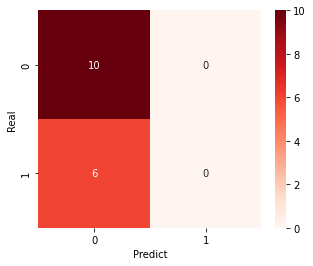

In [42]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [43]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))



F-score               precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.17      0.29         6

    accuracy                           0.69        16
   macro avg       0.83      0.58      0.54        16
weighted avg       0.79      0.69      0.61        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


62.5
F-score               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


62.5
F-score               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

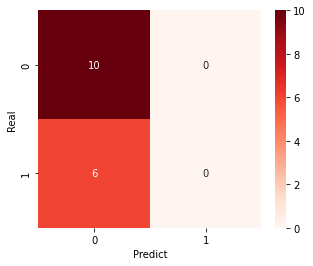

In [46]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# Blue 

In [47]:
Blue_data= dummy_df

In [48]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [49]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:13]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [50]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))


56.25
F-score               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.00      0.00      0.00         3

    accuracy                           0.56        16
   macro avg       0.38      0.35      0.36        16
weighted avg       0.61      0.56      0.58        16



In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

78.125
acc of KNN %  75.0
F-score               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.00      0.00      0.00         3

    accuracy                           0.75        16
   macro avg       0.40      0.46      0.43        16
weighted avg       0.65      0.75      0.70        16



In [52]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,1
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

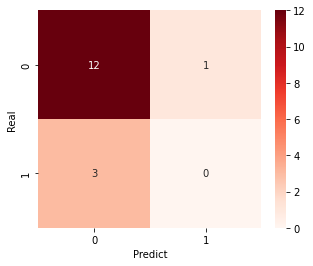

In [53]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [54]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.39      0.42      0.41        16
weighted avg       0.64      0.69      0.66        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


81.25
F-score               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.00      0.00      0.00         3

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


68.75
F-score               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.39      0.42      0.41        16
weighted avg       0.64      0.69      0.66        16



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

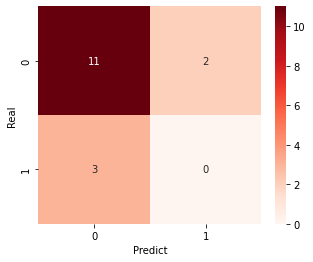

In [57]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# GOld

In [58]:
Gold_data= dummy_df

In [59]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)
Gold_data

,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score_Gold
0,0,0,1,1,0,1,1,1,1,1,1,1,1,0
1,0,0,1,0,0,0,1,1,1,1,1,1,1,0
2,1,1,1,0,0,1,1,1,1,1,1,1,1,0
3,0,1,1,0,0,1,0,0,0,1,1,1,0,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,1,0,0,1,1,0,1,1,1,1,1,1
76,1,1,1,0,0,1,1,1,1,1,1,1,1,0
77,1,0,1,0,0,1,1,1,1,1,1,1,0,0
78,1,1,1,0,0,1,0,0,1,1,1,1,1,0


In [60]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:13]].values
x

array([[0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [62]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)



68.75


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

76.5625
87.5
F-score               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.50      0.50      0.50         2

    accuracy                           0.88        16
   macro avg       0.71      0.71      0.71        16
weighted avg       0.88      0.88      0.88        16



In [64]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

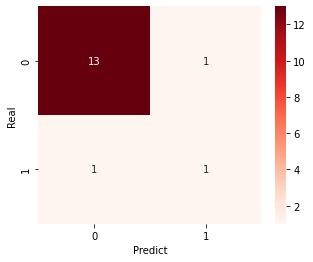

In [65]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [66]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


87.5

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


87.5
F-score               precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.44      0.50      0.47        16
weighted avg       0.77      0.88      0.82        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


87.5
F-score               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.50      0.50      0.50         2

    accuracy                           0.88        16
   macro avg       0.71      0.71      0.71        16
weighted avg       0.88      0.88      0.88        16



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

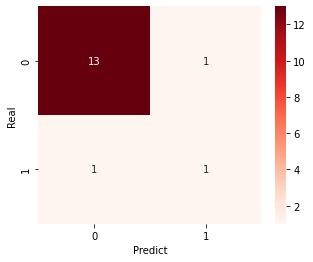

In [69]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# Orange

In [70]:
Orange_data= dummy_df

In [71]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)
Orange_data

,Interface_2,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score_Orange
0,0,0,1,1,0,1,1,1,1,1,1,1,1,0
1,0,0,1,0,0,0,1,1,1,1,1,1,1,0
2,1,1,1,0,0,1,1,1,1,1,1,1,1,1
3,0,1,1,0,0,1,0,0,0,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,1,0,0,1,1,0,1,1,1,1,1,0
76,1,1,1,0,0,1,1,1,1,1,1,1,1,0
77,1,0,1,0,0,1,1,1,1,1,1,1,0,0
78,1,1,1,0,0,1,0,0,1,1,1,1,1,0


In [72]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:13]].values

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [74]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

68.75

In [75]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.00      0.00      0.00         5

    accuracy                           0.69        16
   macro avg       0.34      0.50      0.41        16
weighted avg       0.47      0.69      0.56        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [77]:
knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)

In [78]:
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

y_pred_KNN = knn_model.predict(x_test)


print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

84.375
62.5
acc of KNN %  62.5
F-score               precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.00      0.00      0.00         5

    accuracy                           0.62        16
   macro avg       0.33      0.45      0.38        16
weighted avg       0.46      0.62      0.53        16



In [79]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check


,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Actual')]

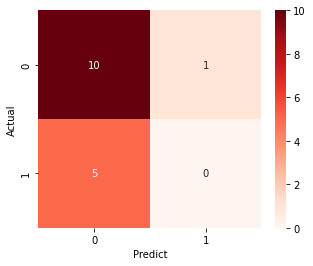

In [80]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Actual")

In [81]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(accuracy_score(y_test, y_pred_networks)*100)
print("F-score",classification_report(y_test, y_pred_networks))


68.75
F-score               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.50      0.20      0.29         5

    accuracy                           0.69        16
   macro avg       0.61      0.55      0.54        16
weighted avg       0.65      0.69      0.64        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


68.75
F-score               precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.00      0.00      0.00         5

    accuracy                           0.69        16
   macro avg       0.34      0.50      0.41        16
weighted avg       0.47      0.69      0.56        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


62.5
F-score               precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.00      0.00      0.00         5

    accuracy                           0.62        16
   macro avg       0.33      0.45      0.38        16
weighted avg       0.46      0.62      0.53        16



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

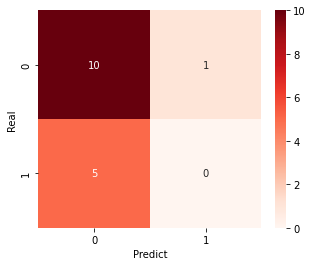

In [84]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# Vector
 all interfaces in one array 

In [85]:
y=New['Test_Score']
x=Interfaces[Interfaces.columns[:13]].values

In [86]:
Y= y
X=x



In [87]:
Y= y
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
weights = {0:0.25,1:0.25,2:0.25,3:0.25}
tree=DecisionTreeClassifier(class_weight=weights)
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))


37.5
F-score               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.40      0.40      0.40         5
           2       0.50      0.50      0.50         2
           3       0.50      0.17      0.25         6

    accuracy                           0.38        16
   macro avg       0.42      0.43      0.39        16
weighted avg       0.43      0.38      0.36        16



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

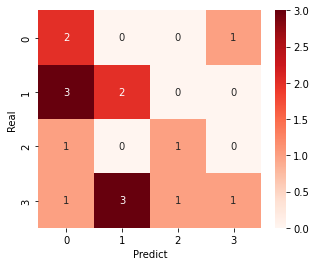

In [88]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [89]:
x = Interfaces[Interfaces.columns[:13]].values
x
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))



7.8125
acc of KNN %  0.0
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5

   micro avg       0.00      0.00      0.00        16
   macro avg       0.00      0.00      0.00        16
weighted avg       0.00      0.00      0.00        16
 samples avg       0.00      0.00      0.00        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(mlpc.score(x_train,y_train)*100)

accuracy_score(y_test, y_pred_networks)*100

6.25


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


18.75

In [91]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))



In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


6.25


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         5

   micro avg       0.20      0.06      0.10        16
   macro avg       0.12      0.12      0.12        16
weighted avg       0.06      0.06      0.06        16
 samples avg       0.06      0.06      0.06        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8 Interfaces to KNN

In [93]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(3, means_Green)
lowest_green = heapq.nsmallest(3, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(3, means_Blue)
lowest_blue = heapq.nsmallest(3, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(3, means_Gold)
lowest_gold = heapq.nsmallest(3, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(3, means_Orange)
lowest_orange = heapq.nsmallest(3, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [94]:
def get_index(array1,array2,full_array):
    high1,high2,high3=array1
    low1,low2,low3=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    return index_high1,index_high2,index_high3,index_low1,index_low2,index_low3

In [95]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [96]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [97]:
selected_factors

[5, 7, 8, 9, 10, 11, 12, 15, 16, 18]

In [98]:
All_factors = [*selected_factors]
New_factors = data_1.iloc[:, All_factors]
# New_factors['Test_Score']=data_1.iloc[:,-1]


In [99]:

for column in New_factors.columns:
    New_factors[column] = convert_values(New_factors[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_22536\1415960429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_factors[column] = convert_values(New_factors[column])


In [100]:
Factors=New_factors
Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_19
0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,0,1,1,1,1,1,1
2,1,0,0,1,1,1,1,1,1,1
3,1,0,0,1,0,0,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,1,0,1,1,1,1
76,1,0,0,1,1,1,1,1,1,1
77,0,0,0,1,1,1,1,1,1,0
78,1,0,0,1,0,0,1,1,1,1


In [101]:
Factors['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_22536\2639090068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Test_Score']=data_1.iloc[:,-1]


In [102]:
x = Factors[Factors.columns[:10]].values
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


40.625
acc of KNN %  12.5
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.40      0.40      0.40         5

   micro avg       0.20      0.12      0.15        16
   macro avg       0.10      0.10      0.10        16
weighted avg       0.12      0.12      0.13        16
 samples avg       0.12      0.12      0.12        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# from sklearn.metrics import confusion_matrix

# m_c = confusion_matrix(y_test, y_pred_KNN)
# plt.figure(figsize=(5, 4))
# sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [104]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))


In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


18.75
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.25      0.50      0.33         2
           3       0.50      0.40      0.44         5

   micro avg       0.30      0.19      0.23        16
   macro avg       0.19      0.23      0.19        16
weighted avg       0.19      0.19      0.18        16
 samples avg       0.19      0.19      0.19        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model per personality highest 3

# GReen

In [106]:
dummy_df = pd.get_dummies(Factors, columns=['Test_Score'])

In [107]:
Green_data=dummy_df
Green_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_19,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,0,1,1,1,1,1,1,1,1,0,0,0
1,0,0,0,0,1,1,1,1,1,1,1,0,0,0
2,1,0,0,1,1,1,1,1,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1,1,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,1,0,1,1,1,1,0,1,0,0
76,1,0,0,1,1,1,1,1,1,1,1,0,0,0
77,0,0,0,1,1,1,1,1,1,0,0,0,1,0
78,1,0,0,1,0,0,1,1,1,1,1,0,0,0


In [108]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)



In [109]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:10]].values

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [111]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



62.5
F-score               precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.50      0.17      0.25         6

    accuracy                           0.62        16
   macro avg       0.57      0.53      0.50        16
weighted avg       0.59      0.62      0.56        16



In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


78.125
acc of KNN %  62.5
F-score               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [113]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0
8,1,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

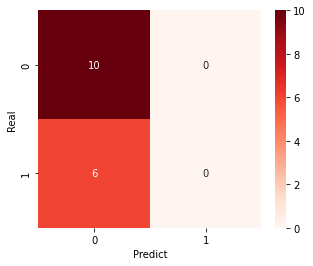

In [114]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [115]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\s

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


62.5
F-score               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


62.5
F-score               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.00      0.00      0.00         6

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# Orange

In [118]:
Orange_data=dummy_df
Orange_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_19,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,0,1,1,1,1,1,1,1,1,0,0,0
1,0,0,0,0,1,1,1,1,1,1,1,0,0,0
2,1,0,0,1,1,1,1,1,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1,1,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,1,0,1,1,1,1,0,1,0,0
76,1,0,0,1,1,1,1,1,1,1,1,0,0,0
77,0,0,0,1,1,1,1,1,1,0,0,0,1,0
78,1,0,0,1,0,0,1,1,1,1,1,0,0,0


In [119]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)



In [120]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:10]].values

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [122]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



56.25
F-score               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.25      0.20      0.22         5

    accuracy                           0.56        16
   macro avg       0.46      0.46      0.46        16
weighted avg       0.54      0.56      0.55        16



In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


79.6875
acc of KNN %  75.0
F-score               precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.20      0.33         5

    accuracy                           0.75        16
   macro avg       0.87      0.60      0.59        16
weighted avg       0.82      0.75      0.69        16



In [124]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

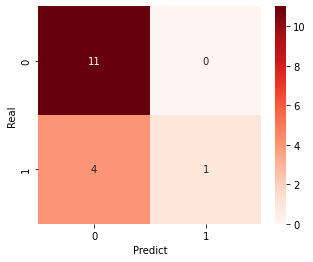

In [125]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [126]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.50      0.20      0.29         5

    accuracy                           0.69        16
   macro avg       0.61      0.55      0.54        16
weighted avg       0.65      0.69      0.64        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


62.5
F-score               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.33      0.20      0.25         5

    accuracy                           0.62        16
   macro avg       0.51      0.51      0.50        16
weighted avg       0.58      0.62      0.59        16



# Blue

In [128]:
Blue_data=dummy_df
Blue_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_19,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,0,1,1,1,1,1,1,1,1,0,0,0
1,0,0,0,0,1,1,1,1,1,1,1,0,0,0
2,1,0,0,1,1,1,1,1,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1,1,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,1,0,1,1,1,1,0,1,0,0
76,1,0,0,1,1,1,1,1,1,1,1,0,0,0
77,0,0,0,1,1,1,1,1,1,0,0,0,1,0
78,1,0,0,1,0,0,1,1,1,1,1,0,0,0


In [129]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)



In [130]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:10]].values

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [132]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



56.25
F-score               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.00      0.00      0.00         3

    accuracy                           0.56        16
   macro avg       0.38      0.35      0.36        16
weighted avg       0.61      0.56      0.58        16



In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


76.5625
acc of KNN %  75.0
F-score               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.00      0.00      0.00         3

    accuracy                           0.75        16
   macro avg       0.40      0.46      0.43        16
weighted avg       0.65      0.75      0.70        16



In [134]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,1
7,1,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

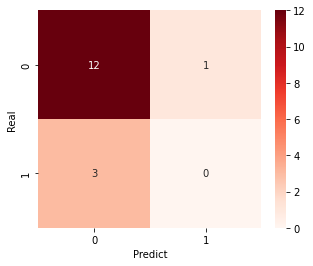

In [135]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [136]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.39      0.42      0.41        16
weighted avg       0.64      0.69      0.66        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


68.75
F-score               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.00      0.00      0.00         3

    accuracy                           0.69        16
   macro avg       0.39      0.42      0.41        16
weighted avg       0.64      0.69      0.66        16



# Gold

In [138]:
Gold_data=dummy_df
Gold_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_19,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,0,1,1,1,1,1,1,1,1,0,0,0
1,0,0,0,0,1,1,1,1,1,1,1,0,0,0
2,1,0,0,1,1,1,1,1,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1,1,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,1,0,1,1,1,1,0,1,0,0
76,1,0,0,1,1,1,1,1,1,1,1,0,0,0
77,0,0,0,1,1,1,1,1,1,0,0,0,1,0
78,1,0,0,1,0,0,1,1,1,1,1,0,0,0


In [139]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)



In [140]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:10]].values

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [142]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



75.0
F-score               precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.25      0.50      0.33         2

    accuracy                           0.75        16
   macro avg       0.58      0.64      0.59        16
weighted avg       0.83      0.75      0.78        16



In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


82.8125
acc of KNN %  62.5
F-score               precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.00      0.00      0.00         2

    accuracy                           0.62        16
   macro avg       0.42      0.36      0.38        16
weighted avg       0.73      0.62      0.67        16



In [144]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,0,0
2,0,1
3,0,1
4,0,0
5,0,0
6,1,0
7,0,1
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

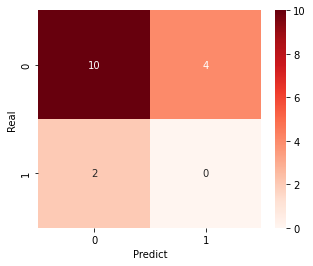

In [145]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [146]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.25      0.50      0.33         2

    accuracy                           0.75        16
   macro avg       0.58      0.64      0.59        16
weighted avg       0.83      0.75      0.78        16



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


75.0
F-score               precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.25      0.50      0.33         2

    accuracy                           0.75        16
   macro avg       0.58      0.64      0.59        16
weighted avg       0.83      0.75      0.78        16

